In [1]:
import numpy as np
import pandas as pd

# Data vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# Pre-built module with some helper functions
import utilities as utl

In [2]:
from pathlib import Path

def get_project_root() -> Path:
    return Path(sys.path[1]).parent.parent.parent

# Data location
ROOT_DIR = get_project_root()
DATA_DIR = os.path.join(ROOT_DIR, 'home/anmol/GitHub/Recommender-System-for-AR-Glasses/Resources/ml-100k/')

# Read dataset
users = pd.read_csv(os.path.join(DATA_DIR, 'u.user'), sep='|', header=None, engine='python', encoding='latin-1')

# Columns describing user characteristics
users.columns = ['Index', 'Age', 'Gender', 'Occupation', 'Zip code']

# Quick overview
users.head()

,Index,Age,Gender,Occupation,Zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [3]:
print('Number of users x features:', users.shape)

Number of users x features: (943, 5)


In [4]:
# Number of users
nb_users = len(users)

# Gender: Convert 'M' and 'F' to 0 and 1
gender = np.where(np.matrix(users['Gender']) == 'M', 0, 1)[0]

print('Shape of gender features:', gender.shape)

# Occupation
occupation_name = np.array(pd.read_csv(os.path.join(DATA_DIR, 'u.occupation'), 
                                            sep='|', header=None, engine='python', encoding='latin-1').loc[:, 0])

# Boolean transformation of user's occupation
occupation_matrix = np.zeros((nb_users, len(occupation_name)))

for k in np.arange(nb_users):
    occupation_matrix[k, occupation_name.tolist().index(users['Occupation'][k])] = 1

print('Shape of user occupation matrix (num of users x num of occupations):', occupation_matrix.shape)

# Concatenation of the sociodemographic variables 
user_attributes = np.concatenate((np.matrix(users['Age']), np.matrix(gender), occupation_matrix.T)).T.tolist()

print('Shape of final user attribute matrix: (list of users with 23 features):', len(user_attributes), len(user_attributes[0]))


Shape of gender features: (943,)
Shape of user occupation matrix (num of users x num of occupations): (943, 21)
Shape of final user attribute matrix: (list of users with 23 features): 943 23


In [5]:
pd.DataFrame(users['Age'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Age,943.0,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0


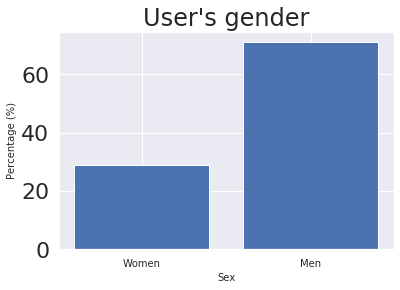

In [6]:
utl.barplot(['Women', 'Men'], np.array([np.mean(gender) , 1 - np.mean(gender)]) * 100, 
            'Sex', 'Percentage (%)', "User's gender", 0)

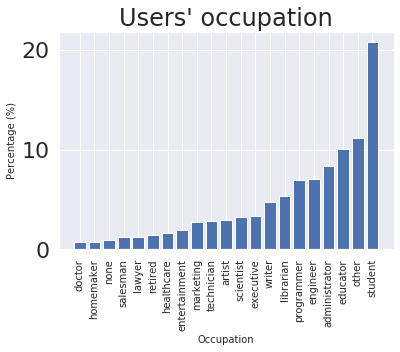

In [7]:
attributes, scores = utl.rearrange(occupation_name, np.mean(occupation_matrix, axis=0) * 100)
utl.barplot(attributes, scores, 'Occupation', 'Percentage (%)', "Users' occupation", 90)

In [8]:
# Read dataset
movies = pd.read_csv(os.path.join(DATA_DIR, 'u.item'), sep='|', header=None, engine='python', encoding='latin-1')

# Number of movies
nb_movies = len(movies)
print('The number of movies is: ', nb_movies)

# Genres
movies_genre = np.matrix(movies.loc[:, 5:])
movies_genre_name = np.array(pd.read_csv(os.path.join(DATA_DIR, 'u.genre'), sep='|', header=None, engine='python', encoding='latin-1').loc[:, 0])

# Quick overview
movies.columns = ['Index', 'Title', 'Release', 'The Not a Number column', 'Imdb'] + movies_genre_name.tolist()
movies.head()

The number of movies is:  1682


,Index,Title,Release,The Not a Number column,Imdb,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


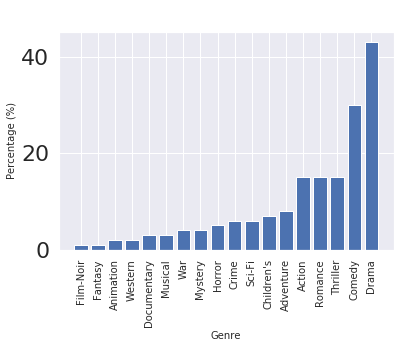

In [9]:
attributes, scores = utl.rearrange(movies_genre_name, 
                                   np.array(np.round(np.mean(movies_genre, axis=0) * 1, 2))[0])
utl.barplot(attributes, np.array(scores) * 100, xlabel='Genre', ylabel='Percentage (%)', 
            title=" ", rotation = 90)

In [10]:
training_set = np.array(pd.read_csv(os.path.join(DATA_DIR, 'u1.base'), delimiter='\t'), dtype='int')
testing_set = np.array(pd.read_csv(os.path.join(DATA_DIR, 'u1.test'), delimiter='\t'), dtype='int')

print('Example sample (user idx, movie idx, rating, timestamp: ', training_set[0])
print('Shape of original training and test set with shape:     ', training_set.shape, testing_set.shape)


Example sample (user idx, movie idx, rating, timestamp:  [        1         2         3 876893171]
Shape of original training and test set with shape:      (79999, 4) (19999, 4)


In [11]:
train_set = utl.convert(training_set, nb_users, nb_movies)
test_set = utl.convert(testing_set, nb_users, nb_movies)

print('Shape of final training set: (list of users x list of all movies):', len(train_set), len(train_set[0]))
print('Shape of final test set:     (list of users x list of all movies):', len(test_set), len(test_set[0]))


Shape of final training set: (list of users x list of all movies): 943 1682
Shape of final test set:     (list of users x list of all movies): 943 1682


In [12]:
train_matrix = np.array(train_set)
assert train_matrix.shape == (943, 1682)

binarized_train_matrix = np.where(train_matrix > 0 , 1, 0)

num_movies_watched = np.sum(binarized_train_matrix, axis=1) ## sum across movies for each user
pd.DataFrame(num_movies_watched).describe().T

,count,mean,std,min,25%,50%,75%,max
0,943.0,84.834571,83.805787,4.0,27.0,50.0,115.0,685.0


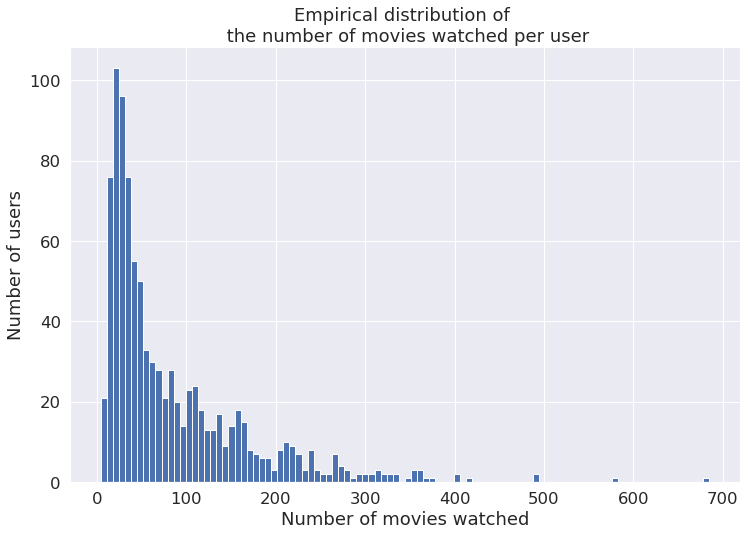

In [13]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.title('Empirical distribution of \n the number of movies watched per user')
plt.xlabel('Number of movies watched')
plt.ylabel('Number of users')
plt.hist(num_movies_watched, 100);

In [14]:
movie_popularity = np.mean(binarized_train_matrix, axis=0)  ## axis 0 refers to averaging across users
pd.DataFrame(movie_popularity).describe().T

,count,mean,std,min,25%,50%,75%,max
0,1682.0,0.050437,0.068664,0.0,0.005302,0.022269,0.066808,0.513256


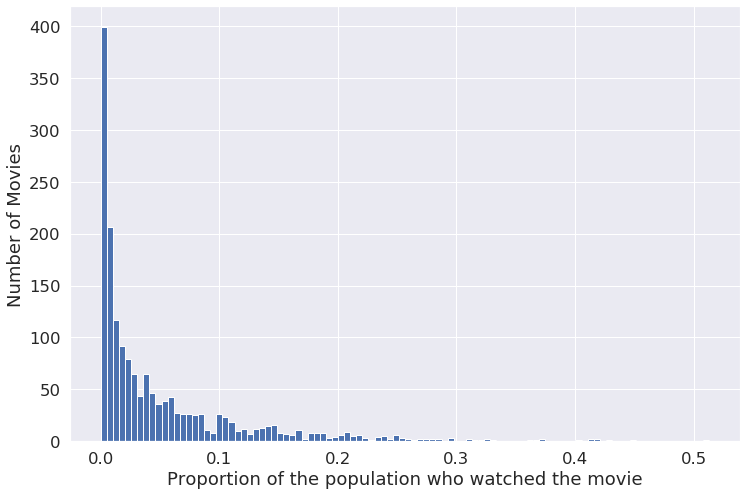

In [15]:
plt.xlabel('Proportion of the population who watched the movie')
plt.ylabel('Number of Movies')
plt.hist(movie_popularity, 100);

In [16]:
def stats_user(data, movies_genre, user_id):
    
    ratings = data[user_id]
    stats = np.zeros(6)
    eva = np.zeros((6, movies_genre.shape[1]))

    for k in np.arange(len(ratings)):
        index = int(ratings[k])
        stats[index] += 1
        eva[index, :] = eva[index, :] + movies_genre[k]

    return stats, eva

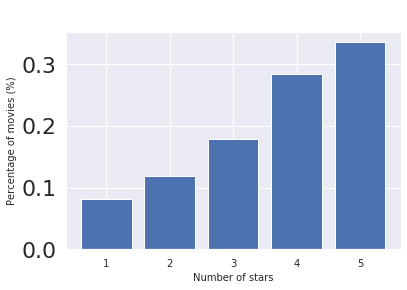

In [17]:
user_id = 0
num_of_star_ratings, genre_based_ratings = stats_user(train_set, movies_genre, user_id)
utl.barplot(np.arange(5) + 1, num_of_star_ratings[1:6] / sum(num_of_star_ratings[1:6]), xlabel='Number of stars', ylabel='Percentage of movies (%)', 
            title=" ", rotation = 0)
